In [63]:
import pandas as pd
import matplotlib.pyplot as plt

session_data = pd.read_csv('/content/Sessions.csv')
session_data.head()

,session_id,search_id,search_time,session_starting_time,booking_id
0,session_322,search_784,2020-01-21T21:35:38.910Z,2020-01-21T21:10:12Z,NaN
1,session_322,search_776,2020-01-21T21:37:37.697Z,2020-01-21T21:10:12Z,NaN
2,session_322,search_623,2020-01-21T21:36:11.392Z,2020-01-21T21:10:12Z,NaN
3,session_322,search_270,2020-01-21T21:16:07.685Z,2020-01-21T21:10:12Z,NaN
4,session_322,search_905,2020-01-21T21:34:55.673Z,2020-01-21T21:10:12Z,NaN


In [64]:
bookings_data = pd.read_csv('/content/Bookings.csv')
bookings_data.head()

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16T22:54:58Z,Android,25717.60,YATRA,1.0,32.0,7712.0
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29T12:25:38Z,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11T16:09:10Z,Android,31791.20,GOIBIBO,1.0,3.0,6570.4


In [ ]:
#1)Find the number of distinct bookings,sessions,and searches from the given datasets
distinct_bookings = bookings_data['booking_id'].nunique()
distinct_sessions = session_data['session_id'].nunique()
distinct_searchs =  session_data['search_id'].nunique()

print('the number of Distinct Bookings:',distinct_bookings)
print('the number of Distinct Sessions:',distinct_sessions)
print('the number of Distinct Searches:',distinct_searchs)

the number of Distinct Bookings: 339
the number of Distinct Sessions: 331
the number of Distinct Searches: 1360


In [ ]:
#2)How many sessions have more than one booking?
sessions_with_multiple_bookings = session_data.groupby('session_id')['booking_id'].count().gt(1).sum()
print(f"Number of sessions with multiple bookings: {sessions_with_multiple_bookings}")

Number of sessions with multiple bookings: 35


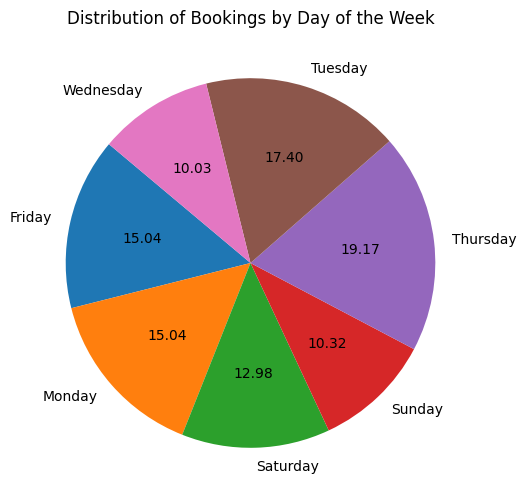

In [62]:
#3)Which days of the week have the highest number of bookings? Also,draw a piechart to show the distribution for all days of the week?
bookings_data['booking_time'] = pd.to_datetime(bookings_data['booking_time'])
bookings_data['day_of_week'] = bookings_data['booking_time'].dt.day_name()
bookings_by_day = bookings_data.groupby('day_of_week')['booking_id'].count()

plt.figure(figsize=(8, 6))
plt.pie(bookings_by_day, labels=bookings_by_day.index, autopct='%0.2f', startangle=140)
plt.title('Distribution of Bookings by Day of the Week')
plt.show()

In [ ]:
#4)For each of the service names,display the total number of bookings and the total Gross Booking Value in INR
service_stats = pd.DataFrame(bookings_data.groupby('service_name')['INR_Amount'].sum().reset_index())
service_stats

,service_name,INR_Amount
0,GOIBIBO,5897637.97
1,MMT,665669.08
2,YATRA,3378702.13


In [ ]:
#5)For customers who have more than 1 booking,which is the most booked route(from_city to to_city)?
customer_bookings = bookings_data.groupby('customer_id')['booking_id'].count()
customer_bookings_morethan_1 = customer_bookings[customer_bookings > 1].index
multiple_bookings = bookings_data[bookings_data['customer_id'].isin(customer_bookings_morethan_1)]
route_bookings = multiple_bookings.groupby(['from_city', 'to_city']).size().reset_index(name='booking_count')
most_booked_route = route_bookings.loc[route_bookings['booking_count'].idxmax()]
print(f"From: {most_booked_route['from_city']} To: {most_booked_route['to_city']} ({most_booked_route['booking_count']} bookings)")

From: Gurgaon To: Roissy-en-France (5 bookings)


In [61]:
#6)Which are the top3 departure cities from where customers book mostly in advance,provided that there have been atleast 5 departures from that city?
advance_bookings_data = bookings_data[bookings_data['days_to_departure'] > 0]
avg_days_to_departure = advance_bookings_data.groupby('from_city')['days_to_departure'].mean()
sorted_cities = avg_days_to_departure.sort_values(ascending=False)
top_3_departure_cities = sorted_cities.head(3)
print("Top 3 departure cities from where customers book mostly in advance:")
print(round(top_3_departure_cities))


Top 3 departure cities from where customers book mostly in advance:
from_city
Durlaga    58.0
Bālāpur    46.0
Kochi      46.0
Name: days_to_departure, dtype: float64


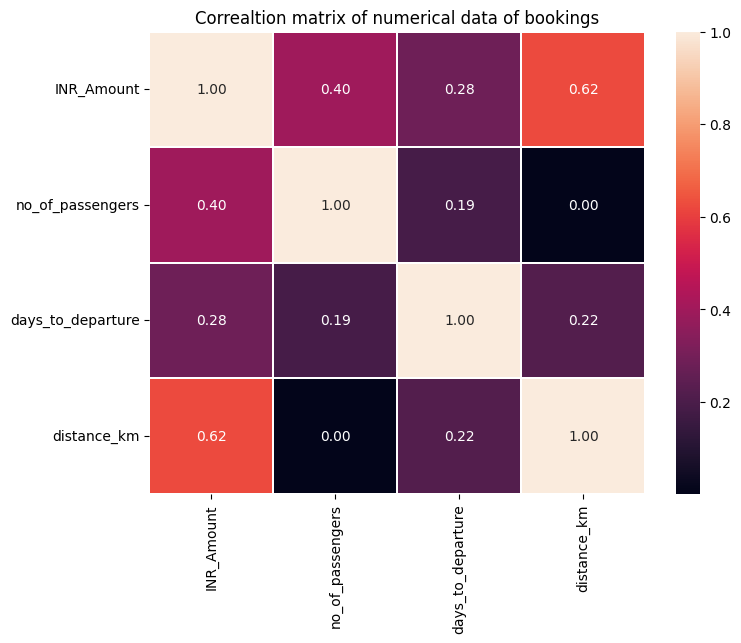

Pair of numerical columns with maximum correlation:
INR_Amount  INR_Amount    1.0
dtype: float64


In [52]:
#7)Plot a heatmap displaying correlations of the numerical column and report which pair of numerical columns in the bookings dataset,have the maximum correlation?
import seaborn as sns
numercial_columns= bookings_data.select_dtypes(include= 'number')
correlation_matrix = numercial_columns.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True,fmt='0.2f',linewidths=0.2)
plt.title("Correaltion matrix of numerical data of bookings")
plt.show()
max_corr_pair = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates().head(1)
print("Pair of numerical columns with maximum correlation:")
print(max_corr_pair)

In [55]:
#8)For each service,which is the most used device type for making bookings on the platform?
device_which_is_used = bookings_data.groupby(['service_name','device_type_used']).size()
most_device_which_is_used = device_which_is_used.groupby(level=0).idxmax().str[1]
print("most used device type for bookings on the platform",most_device_which_is_used)

most used device type for bookings on the platform service_name
GOIBIBO        IOS
MMT        Desktop
YATRA      Desktop
dtype: object


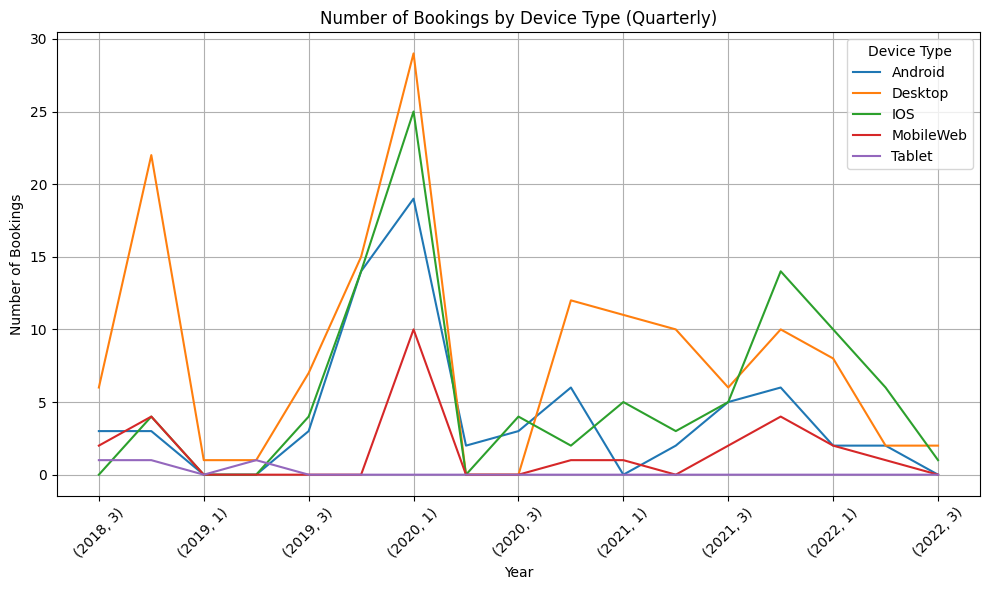

In [56]:
#9)Plot the trends data quarterlyfrequencyforthenumberofbookings by each of the device types, that is,
#plot a time series for each year and quarter showing the number of bookings performed by each device type
bookings_data['booking_time'] = pd.to_datetime(bookings_data['booking_time'])
bookings_data['year'] = bookings_data['booking_time'].dt.year
bookings_data['quarter'] = bookings_data['booking_time'].dt.quarter
quarterly_device_bookings = bookings_data.groupby(['year', 'quarter', 'device_type_used']).size().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(10, 6))

for device_type in quarterly_device_bookings.columns:
    quarterly_device_bookings[device_type].plot(ax=ax, label=device_type)

ax.set_title('Number of Bookings by Device Type (Quarterly)')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Bookings')
ax.legend(title='Device Type')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

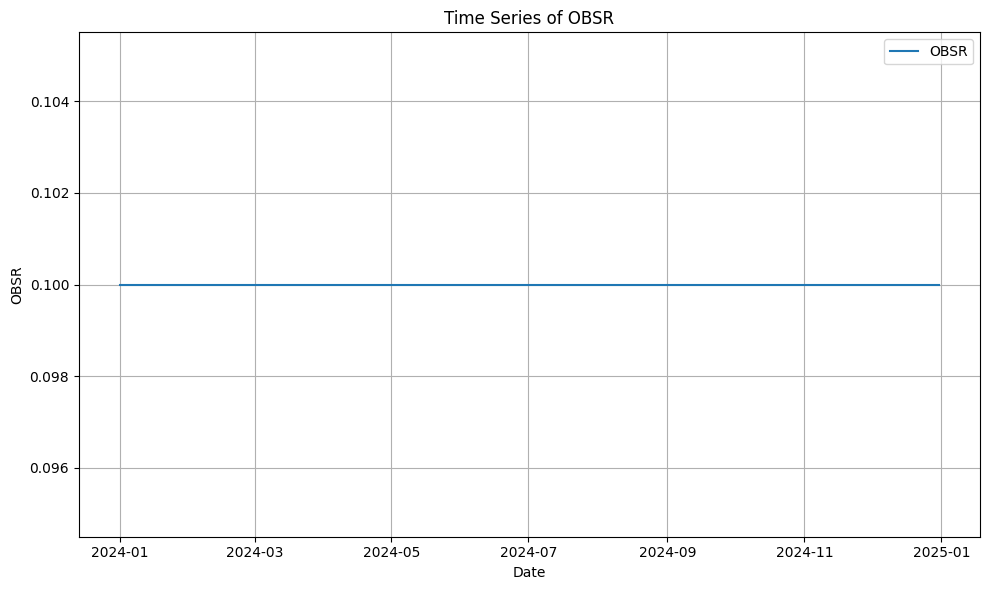

Average OBSR for each month of the year:
Month
April        0.1
August       0.1
December     0.1
February     0.1
January      0.1
July         0.1
June         0.1
March        0.1
May          0.1
November     0.1
October      0.1
September    0.1
Name: OBSR, dtype: float64

Average OBSR for each day of the week:
Day_of_Week
Friday       0.1
Monday       0.1
Saturday     0.1
Sunday       0.1
Thursday     0.1
Tuesday      0.1
Wednesday    0.1
Name: OBSR, dtype: float64


In [60]:
#10)
import pandas as pd
import matplotlib.pyplot as plt

start_date = '2024-01-01'
end_date = '2024-12-31'

dates = pd.date_range(start=start_date, end=end_date, freq='D')
num_days = len(dates)

searches_per_day = 100
bookings_per_day = 10
df = pd.DataFrame({
    'Date': dates,
    'Searches': [searches_per_day] * num_days,
    'Bookings': [bookings_per_day] * num_days,
})

df['OBSR'] = df['Bookings'] / df['Searches']
df['Day_of_Week'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month_name()
avg_obsr_monthly = df.groupby('Month')['OBSR'].mean()
avg_obsr_weekly = df.groupby('Day_of_Week')['OBSR'].mean()
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['OBSR'], label='OBSR')
plt.title('Time Series of OBSR')
plt.xlabel('Date')
plt.ylabel('OBSR')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("Average OBSR for each month of the year:")
print(avg_obsr_monthly)

print("\nAverage OBSR for each day of the week:")
print(avg_obsr_weekly)
